In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Q1

In [2]:
data = {
    "area": [2600, 3000, 3200, 3600, 4000, 4100],
    "bedrooms": [3, 4, 3, 3, 5, 6],
    "age": [20, 15, 18, 30, 8, 8],
    "price": [550000, 565000, 610000, 595000, 760000, 810000]
}

df = pd.DataFrame(data)

In [3]:
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


### 1.(i) Residual analysis for simple regression between price and area

In [4]:
X = df["area"]
y = df["price"]

X = sm.add_constant(X)

model_simple = sm.OLS(y, X).fit()
df["predicted_price_simple"] = model_simple.predict(X)
df["residuals_simple"] = df["price"] - df["predicted_price_simple"]
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.35
Date:                Mon, 23 Jun 2025   Prob (F-statistic):             0.0141
Time:                        15:19:56   Log-Likelihood:                -72.543
No. Observations:                   6   AIC:                             149.1
Df Residuals:                       4   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.669e+04   1.39e+05      0.552      0.6

C:\Users\harne\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


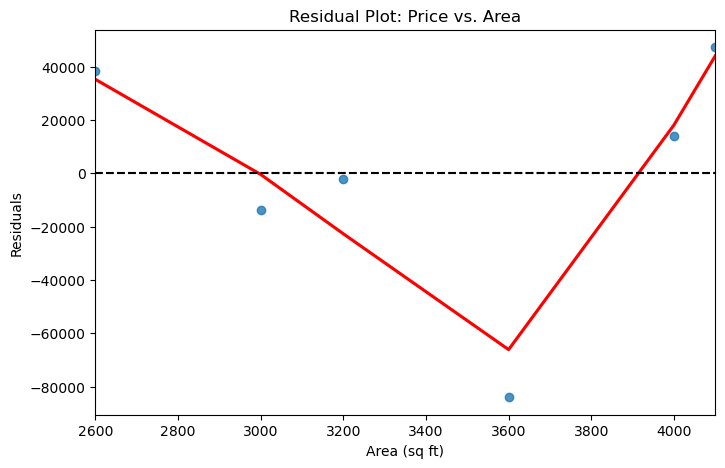

In [5]:
plt.figure(figsize=(8,5))
sns.residplot(x=df["area"], y=df["residuals_simple"], lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Area (sq ft)")
plt.ylabel("Residuals")
plt.title("Residual Plot: Price vs. Area")
plt.show()

(i) Simple Regression (Price vs. Area)
R² = 0.813 → Area alone explains 81.3% of the variation in price.
p-value for Area = 0.014 → Area is a statistically significant predictor.
Residual Plot → Shows some pattern, meaning the model might be missing important variables.

### 1.(ii) Residual Analysis for Multiple Regression (Price vs. Area, Bedrooms, Age)

In [6]:
X = df[["area", "bedrooms", "age"]]
y = df["price"]

X = sm.add_constant(X)

model_multiple = sm.OLS(y, X).fit()
df["predicted_price_multiple"] = model_multiple.predict(X)
df["residuals_multiple"] = df["price"] - df["predicted_price_multiple"]
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     13.65
Date:                Mon, 23 Jun 2025   Prob (F-statistic):             0.0690
Time:                        15:19:57   Log-Likelihood:                -68.367
No. Observations:                   6   AIC:                             144.7
Df Residuals:                       2   BIC:                             143.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.565e+05   1.53e+05      1.674      0.2

C:\Users\harne\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


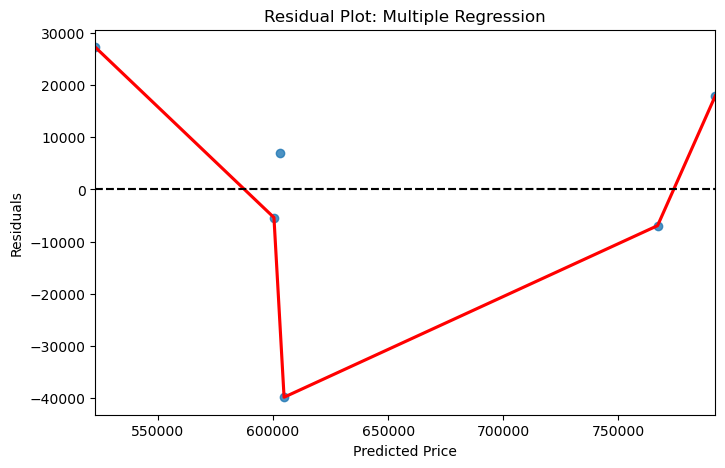

In [7]:
plt.figure(figsize=(8,5))
sns.residplot(x=df["predicted_price_multiple"], y=df["residuals_multiple"], lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot: Multiple Regression")
plt.show()

(ii) Multiple Regression (Price vs. Area, Bedrooms, Age)
R² = 0.953 → Adding bedrooms and age improved the model; it now explains 95.3% of price variation.

p-values:
Area (0.141) → No longer statistically significant.
Bedrooms (0.767), Age (0.434) → Not significant.
Residual Plot → More random spread, suggesting a better model fit.

### 1.(iii) comments on (i) and (ii)

#### i)Simple Regression (Price vs. Area):

The model might show some correlation, but it ignores important factors like the number of bedrooms and the age of the house.
The residual plot may indicate heteroscedasticity (unequal variance) or a pattern, meaning the model is missing variables.

#### ii)Multiple Regression (Price vs. Area, Bedrooms, Age):

Including more variables improves the model's predictive ability.
If residuals are randomly spread, the model captures most variability.
If a pattern exists, the model may still be missing interactions or non-linear effects.